# Profitable Apps from Google and Apple Stores.

### This is my 1st Data-Science project, this project is part of curriculum of the Data-Science course in Dataquest (https://www.dataquest.io/). 
 - We are going to analyse data from Google and Apple Stores and find what are the profitable apps, then we will use that information to provide advice to our inhouse developers in what direction they should take in terms of what apps they should make.
 - The end goal of this project is to come up with suggestions on what Apps our company should be making in order for us to boost our revenues. To be able to do this we will need to find the categories of apps that attracts more users and more user><app engagement.

In [1]:
#I will import all the required resources here to be used in this project:
import pandas as pd # Pandas is a library which is very powerful in data manipulation and analysis
import numpy as np  # NumPy is another library which is very powerful in handling arrays and matrices
import time # to help me evaluating the time it takes to run loops
import matplotlib.pyplot as plt


#### Lets load the data sets into pandas

In [2]:
ios_apps = pd.read_csv('AppleStore.csv')

android_apps = pd.read_csv("googleplaystore.csv")

#### From the above cell
 - We are converting the datasets from the csv format into pandas, the pandas is a powerful library when it comes to data analysis
 - **ios_apps** will take the data set from apple, while the **android_apps** will take the data from the google play store

#### Printing the portion of the data and make general observation of the data set we are dealing with

In [3]:
ios_apps.head() #this allows us to have a glimpse of what data set we are dealing with

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,ver,cont_rating,prime_genre,sup_devices.num,ipadSc_urls.num,lang.num,vpp_lic
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,95.0,4+,Social Networking,37,1,29,1
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,10.23,12+,Photo & Video,37,0,29,1
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9.24.12,9+,Games,38,5,18,1
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,1.6.2,9+,Games,40,5,1,1
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,8.4.1,12+,Music,37,4,1,1


In [4]:
#this function will provide an overview of the data set
ios_apps.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7197 entries, 0 to 7196
Data columns (total 16 columns):
id                  7197 non-null int64
track_name          7197 non-null object
size_bytes          7197 non-null int64
currency            7197 non-null object
price               7197 non-null float64
rating_count_tot    7197 non-null int64
rating_count_ver    7197 non-null int64
user_rating         7197 non-null float64
user_rating_ver     7197 non-null float64
ver                 7197 non-null object
cont_rating         7197 non-null object
prime_genre         7197 non-null object
sup_devices.num     7197 non-null int64
ipadSc_urls.num     7197 non-null int64
lang.num            7197 non-null int64
vpp_lic             7197 non-null int64
dtypes: float64(3), int64(8), object(5)
memory usage: 899.8+ KB


#### From the above cell
 - There are 7197 rows in the dataset
 - There 16 columns 
 - There are no **null** rows and hence we do not have to worry about the dealing the **null** data.
 - Next lets look at the data set on a different perspective.

In [5]:
#Here wer are trying to have an overview of the price column, this is because our company is interested in having 
ios_apps['price'].unique()

array([  0.  ,   1.99,   0.99,   6.99,   2.99,   7.99,   4.99,   9.99,
         3.99,   8.99,   5.99,  14.99,  13.99,  19.99,  17.99,  15.99,
        24.99,  20.99,  29.99,  12.99,  39.99,  74.99,  16.99, 249.99,
        11.99,  27.99,  49.99,  59.99,  22.99,  18.99,  99.99,  21.99,
        34.99, 299.99,  23.99,  47.99])

#### From the above cell
 - The column price has a number of values most of which are non zero
 - This means that the not all apps in the list are free
 - Our analyis is based on the free apps only so we should get rid of the non free apps
 

In [6]:
apps_names_original = ios_apps['track_name'].unique().tolist()
print(apps_names_original)


['Facebook', 'Instagram', 'Clash of Clans', 'Temple Run', 'Pandora - Music & Radio', 'Pinterest', 'Bible', 'Candy Crush Saga', 'Spotify Music', 'Angry Birds', 'Subway Surfers', 'Fruit Ninja Classic', 'Solitaire', 'CSR Racing', 'Crossy Road - Endless Arcade Hopper', 'Injustice: Gods Among Us', 'Hay Day', 'Clear Vision (17+)', 'Minecraft: Pocket Edition', 'PAC-MAN', 'Calorie Counter & Diet Tracker by MyFitnessPal', 'DragonVale', 'The Weather Channel: Forecast, Radar & Alerts', 'Head Soccer', 'Google – Search made just for mobile', 'Despicable Me: Minion Rush', 'The Sims™ FreePlay', 'Google Earth', 'Plants vs. Zombies', 'Sonic Dash', 'Groupon - Deals, Coupons & Discount Shopping App', '8 Ball Pool™', 'Tiny Tower - Free City Building', 'Jetpack Joyride', 'Bike Race - Top Motorcycle Racing Games', 'Shazam - Discover music, artists, videos & lyrics', 'Kim Kardashian: Hollywood', 'Doodle Jump', 'Trivia Crack', 'WordBrain', 'Sniper 3D Assassin: Shoot to Kill Gun Game', 'Flow Free', 'Lose It! –

In [7]:
#this help us to know how many apps names we have
len(apps_names_original)

7195

 #### Things noted from the observation of data above
 
 
 - dataframe.info()
   - There are  7197 rows 
   - There are 16 columns,Need to delete some irrelevant columns **<Action item 1>**
 - Skimming on the price column it was observed that
   - There are some non-free apps that are irrelevant and might need to be deleted **<Action item 2>**.
 - Looking at app_name.unique it was observed that two apps are appearing twice in the data set
   - These will need to be further investigated **<action item 3>**.
 - Looking at the tracks name column it has been observed that there some apps that are not English apps, this will need to be further investigated and decided if they should be included or they should be dropped out of our analysis **<action item 4>**.
 - Now that all the English apps have been isolated, it should be inspected to see what is the 


## Data cleaning!

 - From the above quick glance of the data set, the next step should be working on all the four identified action items.

### Action item 1

 - creating a new data set that will be easy to work with, containing only the most relevant columns
 
 
 |  Numbering | variable | Description |DROP/KEEP
| --- | --- | --- |---|
|  1 | “id”	|App ID|KEEP
| 2	 |“track_name”|App Name |KEEP
| 3  |“size_bytes”|Size (in Bytes)|KEEP
| 4  |“currency” |Currency Type|KEEP
| 5|“price”|Price amount |KEEP
|6|“rating_count_tot”|User Rating counts (for all version)|KEEP
| 7 |“rating_count_ver”|User Rating counts (for current version)|KEEP
|8  |“user_rating”|Average User Rating value (for all version) |KEEP
|9  |“user_rating_ver”	|Average User Rating value (for current version)|KEEP
|10 |“ver” |Latest version code|DROP
|11 |“cont_rating” |Content Rating|KEEP
|12 |“prime_genre” |Primary Genre |KEEP
|13 |“sup_devices.num”|Number of supporting devices |DROP
|14 |“ipadSc_urls.num”|Number of screenshots showed for display|DROP
|15 |“lang.num”	|Number of supported languages |DROP
|16 |“vpp_lic” |Vpp Device Based Licensing Enabled|DROP
   
   
    


In [8]:
#display the list of columns in the current data set.
ios_apps.columns

Index(['id', 'track_name', 'size_bytes', 'currency', 'price',
       'rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver', 'ver', 'cont_rating', 'prime_genre',
       'sup_devices.num', 'ipadSc_urls.num', 'lang.num', 'vpp_lic'],
      dtype='object')

In [9]:
#create anothe list and include only the columns that are more relevant to our end goal.
relevant_col = ['id','track_name','size_bytes','currency','price','rating_count_tot', 'rating_count_ver', 'user_rating',
       'user_rating_ver','cont_rating', 'prime_genre']
relevant_col

['id',
 'track_name',
 'size_bytes',
 'currency',
 'price',
 'rating_count_tot',
 'rating_count_ver',
 'user_rating',
 'user_rating_ver',
 'cont_rating',
 'prime_genre']

In [10]:
#lets now filter only the columns that we want
ios_mod_apps = ios_apps[relevant_col]
#now we have a new data set ios_mod_apps,which is a modified and thus we have checked action item 1
ios_mod_apps

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,4+,Social Networking
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,12+,Photo & Video
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9+,Games
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,9+,Games
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,12+,Music
...,...,...,...,...,...,...,...,...,...,...,...
7192,1170406182,Shark Boom - Challenge Friends with your Pet,245415936,USD,0.0,0,0,0.0,0.0,4+,Games
7193,1069830936,【謎解き】ヤミすぎ彼女からのメッセージ,16808960,USD,0.0,0,0,0.0,0.0,9+,Book
7194,1070052833,Go!Go!Cat!,91468800,USD,0.0,0,0,0.0,0.0,12+,Games
7195,1081295232,Suppin Detective: Expose their true visage!,83026944,USD,0.0,0,0,0.0,0.0,12+,Entertainment


### Action item 2
 - There are some non-free apps that are irrelevant and might need to be deleted

In [11]:
#now lets filter out all the apps that are free aka their price is 0.0
ios_mod_apps = ios_mod_apps[ios_mod_apps['price'] == 0.0]
ios_mod_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4056 entries, 0 to 7196
Data columns (total 11 columns):
id                  4056 non-null int64
track_name          4056 non-null object
size_bytes          4056 non-null int64
currency            4056 non-null object
price               4056 non-null float64
rating_count_tot    4056 non-null int64
rating_count_ver    4056 non-null int64
user_rating         4056 non-null float64
user_rating_ver     4056 non-null float64
cont_rating         4056 non-null object
prime_genre         4056 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 380.2+ KB


In [12]:
#lets make sure our updated dataframe has all the free apps.
ios_mod_apps['price'].unique()

array([0.])

### Action item 3
 - Apps that are appearing more than once in the data set

In [13]:
#lets answer the question: are there apps that apearing more than once in the data set?
ios_mod_apps['track_name'].describe()

count                    4056
unique                   4054
top       Mannequin Challenge
freq                        2
Name: track_name, dtype: object

 - There are 4056 entries in this data set but only 4054 unique 
 - Lets now find those two items, from above cell its clear that **Mannequin Challenge** is one of the apps that is appearing more than once so we have to work on getting what is the second app
 

In [14]:
#lets identify the apps that are happening more than once! 

ios_mod_apps['track_name'].value_counts()

Mannequin Challenge                           2
VR Roller Coaster                             2
Brake or Break                                1
PAC-MAN 256 - Endless Arcade Maze             1
Craft your games! - Createrria 2              1
                                             ..
無料で音楽や写真・カメラの裏技アプリ for iPhone7                1
Endless Sky                                   1
Tinker Island: Survival Adventure             1
Pixel Strike-Sniper zombies shooting games    1
Ninja UP!                                     1
Name: track_name, Length: 4054, dtype: int64

- from the above cell we now know that we have two apps **Mannequin Challenge** and **VR Roller Coaster** that for some reason are showing up more than once!
- Next; lets see the rows in which the two apps appear and investigate

In [15]:
ios_mod_apps[(ios_mod_apps['track_name'] == 'Mannequin Challenge')|(ios_mod_apps['track_name'] == 'VR Roller Coaster') ]

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre
2948,1173990889,Mannequin Challenge,109705216,USD,0.0,668,87,3.0,3.0,9+,Games
4442,952877179,VR Roller Coaster,169523200,USD,0.0,107,102,3.5,3.5,4+,Games
4463,1178454060,Mannequin Challenge,59572224,USD,0.0,105,58,4.0,4.5,4+,Games
4831,1089824278,VR Roller Coaster,240964608,USD,0.0,67,44,3.5,4.0,4+,Games


**From the above two cells it has been observed that**
 - Both **Mannequin Challenge** and **VR Roller Coaster** appear twice but looks like they are two different apps maybe with just the same name
 - The only way to tell them appart is by looking at the track id

**Conclusion is the apps that are appearing with the same name, might be different apps as they both have different apps ID so we will keep them for now**

### Action item 4
- All apps that are not English should be found and eliminated 

#### Looking at the overview of the apps names

In [16]:
#Inspect some names of the apps
ios_mod_apps['track_name']

0                                           Facebook
1                                          Instagram
2                                     Clash of Clans
3                                         Temple Run
4                            Pandora - Music & Radio
                            ...                     
7192    Shark Boom - Challenge Friends with your Pet
7193                             【謎解き】ヤミすぎ彼女からのメッセージ
7194                                      Go!Go!Cat!
7195     Suppin Detective: Expose their true visage!
7196             みんなのお弁当 by クックパッド ~お弁当をレシピ付きで記録・共有~
Name: track_name, Length: 4056, dtype: object

#### Write a function that will take a name and decide if it is an English name or not

In [17]:
def is_app_english(string):
    #check if the how long is the apps name
    #if the name is only one char lets see if its a alnum or not
    no_of_char = 0
    if len(string) == 1:
        if ord(string) > 127:
            return 'NOT ENGLISH'
        else:
            return 'ENGLISH'
    elif len(string) == 2:
        list1 = list(string)
        for i in range(len(list1)):
            if list1[i] == ' ':
                list1[i] = '友'
                string = "".join(list1)
            for char in string:
                if ord(char) > 127:
                    no_of_char += 1
                if no_of_char > 0:
                    return 'NOT ENGLISH'
                else:
                    return 'ENGLISH'
    elif len(string) > 2:
        list1 = list(string)
        for i in range(len(list1)):
            if list1[i] == ' ':
                list1[i] = ''                    #for strings with more than 2 char we are removing the spaces
                string = "".join(list1)
        for char in string:
            if ord(char) > 127:
                no_of_char += 1
        if no_of_char >=2:
            return 'NOT ENGLISH'
        else:
            return 'ENGLISH'


#### Filter all apps that are english apps into a new dataset that we will work with from now on wards

In [18]:
start = time.time()
ios_mod2_apps = ios_mod_apps[(ios_mod_apps['track_name'].apply(is_app_english))== 'ENGLISH']
end = time.time()
print(end-start)

0.024933576583862305


#### Inspecting the new dataset quickly to get an idea of what we have under the hood

In [19]:
ios_mod2_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3169 entries, 0 to 7195
Data columns (total 11 columns):
id                  3169 non-null int64
track_name          3169 non-null object
size_bytes          3169 non-null int64
currency            3169 non-null object
price               3169 non-null float64
rating_count_tot    3169 non-null int64
rating_count_ver    3169 non-null int64
user_rating         3169 non-null float64
user_rating_ver     3169 non-null float64
cont_rating         3169 non-null object
prime_genre         3169 non-null object
dtypes: float64(3), int64(4), object(4)
memory usage: 297.1+ KB


#### Skim through the new dataset, trying to see what type of apps are performing better

In [20]:
#displaying the whole dataset so that we can have idea of how the data set is
pd.set_option('display.max_rows', None)
ios_mod2_apps

,id,track_name,size_bytes,currency,price,rating_count_tot,rating_count_ver,user_rating,user_rating_ver,cont_rating,prime_genre
0,284882215,Facebook,389879808,USD,0.0,2974676,212,3.5,3.5,4+,Social Networking
1,389801252,Instagram,113954816,USD,0.0,2161558,1289,4.5,4.0,12+,Photo & Video
2,529479190,Clash of Clans,116476928,USD,0.0,2130805,579,4.5,4.5,9+,Games
3,420009108,Temple Run,65921024,USD,0.0,1724546,3842,4.5,4.0,9+,Games
4,284035177,Pandora - Music & Radio,130242560,USD,0.0,1126879,3594,4.0,4.5,12+,Music
5,429047995,Pinterest,74778624,USD,0.0,1061624,1814,4.5,4.0,12+,Social Networking
6,282935706,Bible,92774400,USD,0.0,985920,5320,4.5,5.0,4+,Reference
7,553834731,Candy Crush Saga,222846976,USD,0.0,961794,2453,4.5,4.5,4+,Games
8,324684580,Spotify Music,132510720,USD,0.0,878563,8253,4.5,4.5,12+,Music
9,343200656,Angry Birds,175966208,USD,0.0,824451,107,4.5,3.0,4+,Games


### Best performing Genre
 - It is not about what app is performing more, because the interest is to find the app that will be productive then it has to be identified what type of apps are likely going to perform better in the market.
 - Identifying a well performing genre offers a chance for an app to be made on the same genre to tap the mass vibe.

#### First what is the app composition in all the app genres we have?

In [21]:
#This function will show the weight of every genre in terms of what is its % composition in the dataset

def freq_table_genre(dataset):
    freq_table = {}
    total_no_of_apps = 0
    for row in dataset:
        total_no_of_apps += 1
        if row in freq_table:
            freq_table[row] += 1
        else:
            freq_table[row] = 1
    freq_table_percentage = {}
    for key in freq_table:
        percentage = (freq_table[key]/total_no_of_apps)* 100
        freq_table_percentage[key] = percentage
        list1 = freq_table_percentage.items()
        
    return sorted(list1,key=lambda x : x[1], reverse = True)

In [22]:
#Using the function above we are going to look at the % composition of each genre in the data set
start = time.time()
freq_table_by_genre = freq_table_genre(ios_mod2_apps['prime_genre'])
end = time.time()
print(end -start)
freq_table_by_genre


0.0009982585906982422


[('Games', 58.53581571473651),
 ('Entertainment', 7.82581255916693),
 ('Photo & Video', 5.0489113284947935),
 ('Education', 3.72357210476491),
 ('Social Networking', 3.2817923635216157),
 ('Shopping', 2.5244556642473968),
 ('Utilities', 2.398232881035027),
 ('Sports', 2.1773430104133795),
 ('Music', 2.0511202272010096),
 ('Health & Fitness', 1.9880088355948247),
 ('Productivity', 1.7040075733669928),
 ('Lifestyle', 1.5462290943515304),
 ('News', 1.3253392237298833),
 ('Travel', 1.1360050489113285),
 ('Finance', 1.1044493531082362),
 ('Weather', 0.8520037866834964),
 ('Food & Drink', 0.8204480908804039),
 ('Reference', 0.5364468286525718),
 ('Business', 0.5364468286525718),
 ('Book', 0.3786683496371095),
 ('Navigation', 0.18933417481855475),
 ('Medical', 0.18933417481855475),
 ('Catalogs', 0.12622278321236985)]

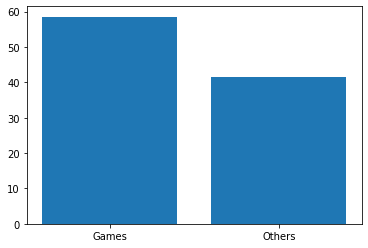

In [23]:
x, y = zip(*freq_table_by_genre) # unpack a list of pairs into two tuples
y1 = y[0]
y2 = sum(y[1:])
y = [y1,y2]
x = [x[0], 'Others']
plt.bar(x,y)
plt.show()


### OBSERVATION 1
#### Simply from the above cell we can see
 - More than half of apps in apple store are Games
     - This is interesting, I would like to skim through the apps in the **Games** genre and see if they are all games or something is not right.
     - **Would be an interesting chart if this could be compared with the number of rating_count, average rating etc**
 - THIS SHOULD BE PLOTTED TO SHOW VISUALS

In [24]:
#this function is used to find the summation of the rating of all apps in Genre and return the value
def getting_rating_for_genre(genre):
    gen_rating = ios_mod2_apps.groupby('prime_genre', as_index=False).agg({'rating_count_tot': "sum"})
    for index, item in gen_rating.iterrows():
        if item[0] == genre:
            
            return item[1]
        else:
            pass

In [25]:
def getting_genre_rating_count_dic (dataset):
    list_of_genre = dataset['prime_genre'].unique()
    total_rating_count = dataset['rating_count_tot'].sum()
    genre_rating_count = {}
    total_count = 0
    for item in list_of_genre:
        genre_rating_count[item] = (getting_rating_for_genre(item)/total_rating_count)*100
        
    dic_items = genre_rating_count.items()
    return sorted(dic_items,key=lambda x : x[1], reverse = True)

In [26]:
#This is a unit test to see that the function we wrote above making sure that things works well
assert getting_rating_for_genre('Utilities') == 1512436
assert getting_rating_for_genre('Health & Fitness') == 1514371

In [27]:
rating_count_composition = getting_genre_rating_count_dic(ios_mod2_apps)

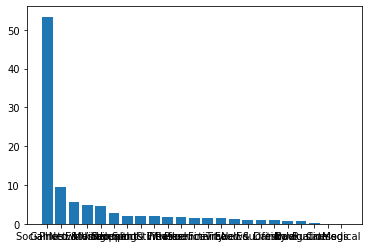

In [28]:
#lists = sorted(rating_count_composition.items()) # sorted by key, return a list of tuples

x, y = zip(*rating_count_composition) # unpack a list of pairs into two tuples

plt.bar(x,y)
plt.show()

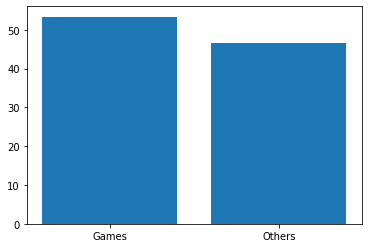

In [29]:
y[0]
sum(y[1:])
y1 = [y[0],sum(y[1:])]
x1 = ['Games', 'Others']
plt.bar(x1,y1)
plt.show()

### OBSERVATION 2
#### Few things to note from the above cell
 - This will also be an interesting visual to see
 - This still tell the same story
     - The Games genre receives over half of the total ratings given to all apps
     - Some few app genres receives very small rating, less than 1% of all the rating
 - This is different from **OBSERVATION 1**
#### There some apps that are making up more than 30% of the rating count for the genre, after some inspection it was found that this is not the case for the Games genre on the apple store so we do not need to do further investigation

## Conclusion

- From the above observations (Observation 2 and Observation 1) it can be concluded that **The Games genre** is the best genre on the apple store.


**Now lets look at android apps**

In [30]:
#lets have an overview of the data set we are looking for
android_apps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [31]:
#lets look at column wise information
android_apps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


#### From above cell 
 - We can see that there several null values
     - **Rating** has the most null objects
     - **Type** has one null object
     - **Content Rating** has one null object
     - **Current Ver** has 8 null objects
     - **Android Ver** has 3 null objects
     

#### Lets inspect all the columns with the null value and see how it will affect our data analysis

In [32]:
#Lets start by looking at the Rating column; focusing only on the null objects
android_apps[android_apps['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
23,Mcqueen Coloring pages,ART_AND_DESIGN,NaN,61,7.0M,"100,000+",Free,0,Everyone,Art & Design;Action & Adventure,"March 7, 2018",1.0.0,4.1 and up
113,Wrinkles and rejuvenation,BEAUTY,NaN,182,5.7M,"100,000+",Free,0,Everyone 10+,Beauty,"September 20, 2017",8.0,3.0 and up
123,Manicure - nail design,BEAUTY,NaN,119,3.7M,"50,000+",Free,0,Everyone,Beauty,"July 23, 2018",1.3,4.1 and up
126,Skin Care and Natural Beauty,BEAUTY,NaN,654,7.4M,"100,000+",Free,0,Teen,Beauty,"July 17, 2018",1.15,4.1 and up
129,"Secrets of beauty, youth and health",BEAUTY,NaN,77,2.9M,"10,000+",Free,0,Mature 17+,Beauty,"August 8, 2017",2.0,2.3 and up
130,Recipes and tips for losing weight,BEAUTY,NaN,35,3.1M,"10,000+",Free,0,Everyone 10+,Beauty,"December 11, 2017",2.0,3.0 and up
134,"Lady adviser (beauty, health)",BEAUTY,NaN,30,9.9M,"10,000+",Free,0,Mature 17+,Beauty,"January 24, 2018",3.0,3.0 and up
163,Anonymous caller detection,BOOKS_AND_REFERENCE,NaN,161,2.7M,"10,000+",Free,0,Everyone,Books & Reference,"July 13, 2018",1.0,2.3 and up
180,SH-02J Owner's Manual (Android 8.0),BOOKS_AND_REFERENCE,NaN,2,7.2M,"50,000+",Free,0,Everyone,Books & Reference,"June 15, 2018",3.0,6.0 and up
185,URBANO V 02 instruction manual,BOOKS_AND_REFERENCE,NaN,114,7.3M,"100,000+",Free,0,Everyone,Books & Reference,"August 7, 2015",1.1,5.1 and up


In [33]:
len(android_apps[android_apps['Rating'].isnull()])

1474

#### From above cell we can it can be observed
 - There 1474 apps that are having NaN values in the rating column
 - It can not be conclude now how fatal this can be in our analysis because it depends on how we are going to use this column in the future so lets carry on

In [37]:
#lets inspect the null value on the  Type column
android_apps[android_apps['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device


#### From the cell above
 - This one app that has a NaN value at type has a price of 0 so we can just adjust the Type value to Free

In [38]:
android_apps['Type'].fillna("Free", inplace = True) 

In [40]:
#lets inspect the null value on the  Content Rating column
android_apps[android_apps['Content Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


#### From the cell above
 - There is obviously no harm to just leave it

In [41]:
#lets inspect the null value on the  Current Ver column
android_apps[android_apps['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
6803,BT Master,FAMILY,NaN,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up
7407,Calculate My IQ,FAMILY,NaN,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up
7730,UFO-CQ,TOOLS,NaN,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,NaN,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up


#### from above cell 
 - From a quick glance the Current ver is not much of important... I will see if it is needed in the analisys later